Install Required Packages

In [1]:
## Importing required packages
import numpy as np
import nose
import matplotlib
import os

import sklearn.preprocessing as pre
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import skimage.feature as feat

from igor import binarywave

In [2]:
## Setting user variables for importing dataset

folder_path = 'C:/Users/Josh_/Downloads/As_grown'


## Importing the image data from .ibw and assigning to list dat
d = {}
dat = []
for root, dirs, files in os.walk(folder_path):
    for i, name in enumerate(files):
        d = binarywave.load(root + '/' + name)
        dat.append((d['wave']['wData']))

In [3]:
## Extracting data into observables and normalizing

height = [dat[i][:,:,0] for i in range(len(dat))]
for k in range(len(height)):
    height[k] = pre.StandardScaler().fit_transform(height[k])

amp1 = [dat[i][:,:,1] for i in range(len(dat))]
for k in range(len(height)):
    amp1[k] = pre.StandardScaler().fit_transform(amp1[k])

amp2 = [dat[i][:,:,2] for i in range(len(dat))]
for k in range(len(height)):
    amp2[k] = pre.StandardScaler().fit_transform(amp2[k])

phase1 = [dat[i][:,:,3] for i in range(len(dat))]
for k in range(len(height)):
    phase1[k] = pre.StandardScaler().fit_transform(phase1[k])

phase2 = [dat[i][:,:,4] for i in range(len(dat))]
for k in range(len(height)):
    phase2[k] = pre.StandardScaler().fit_transform(phase2[k])


In [4]:
## Registering data via translation from the regist data set and choping images at 

regist = height[0]

translation =[feat.register_translation((regist),(height[i]))[0] for i in range(len(height))]

for k in range(len(height)):
    height[k] = np.roll(height[k], (int(translation[k][0]),int(translation[k][1])), (0,1))
    amp1[k] = np.roll(amp1[k], (int(translation[k][0]),int(translation[k][1])), (0,1))
    amp2[k] =np.roll(amp2[k], (int(translation[k][0]),int(translation[k][1])), (0,1))
    phase1[k] = np.roll(phase1[k], (int(translation[k][0]),int(translation[k][1])), (0,1))
    phase2[k] = np.roll(phase2[k], (int(translation[k][0]),int(translation[k][1])), (0,1))

In [5]:
translation_np = np.array(translation)
type(translation_np)
pos = np.max(translation_np, axis = 0)
neg = np.min(translation_np, axis = 0)

chop = [0,0]
for i in range(2):
    if abs(pos[i]) > abs(neg[i]):
        chop[i] = int(pos[i])
    else:
        chop[i] = int(neg[i])

        dat = [height, amp1, amp2, phase1, phase2]

for i in range(len(height)):
    for k in range(4):
        if chop[0] >= 0 and chop[1] >= 0:
            dat[k][i] = dat[k][i][(chop[0]):,(chop[1]):]
        
        elif chop[0] >= 0 and chop[1] < 0:
            dat[k][i] = dat[k][i][(chop[0]):,:(chop[1])]
        
        elif chop[0] < 0 and chop[1] >= 0:
            dat[k][i] = dat[k][i][:(chop[0]),(chop[1]):]
        
        else:
            dat[k][i] = dat[k][i][:(chop[0]),:(chop[1])]
        
        dat[k][i] = pre.StandardScaler().fit_transform(dat[k][i])

height = dat[0]
amp1 = dat[1]
amp2 = dat[2]
phase1 = dat[3]
phase2 = dat[4]

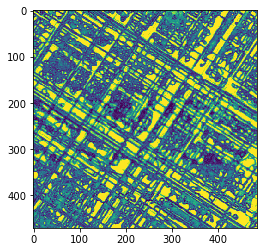

In [22]:
%matplotlib inline
ax = plt.imshow(np.flipud(amp1[6].T))
ax.set_clim(-1.5,1.5)
#plt.savefig('C:/Users/Josh_/Downloads/As_grown/twocomp', format='png', dpi=1000)

In [ ]:
type(translation)

In [ ]:
np.amax(translation)

In [23]:
from skimage import io
im1 = io.imread(r'/Users/Josh_/Downloads/As_grown/onecomp')
im2 = io.imread(r'/Users/Josh_/Downloads/As_grown/twocomp')


In [24]:
shift, error, diffphase = feat.register_translation(im1, im2)

In [25]:
print(shift, error, diffphase)

[ 0.  0.  0.] 0.00653575986371 9.86381730957e-20


In [26]:
from skimage.measure import compare_ssim as ssim

test = ssim(im1,im2, multichannel = True)


In [27]:
print(test)

0.998664009404
